# Test read new ECMWF data and altitude field

**DATE: 8/2/2018**


In [1]:
import pyaerocom as pya

DIR = '/lustre/storeA/project/aerocom/aerocom-users-database/ECMWF/ECMWF_GSTX_T255/renamed/'

EC_FILE = DIR + 'ECMWF_GSTX.daily.ec532aer.2010.nc'
ALT_FILE = DIR + 'ECMWF_GSTX.daily.z.2010.nc'

pya.change_verbosity('warning')

Init data paths for lustre


0.007927179336547852 s


### Load file with altitude data

In [2]:
alt = pya.GriddedData(ALT_FILE)
alt.grid

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lat' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lon' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'level' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


<iris 'Cube' of geopotential / (m) (time: 365; model_level_number: 60; latitude: 241; longitude: 480)>

#### Quick check if time stamps are okay

In [3]:
print(alt.time_stamps()[:3])
print(alt.time_stamps()[-3:])

['2010-01-01T00:00:00.000000' '2010-01-02T00:00:00.000000'
 '2010-01-03T00:00:00.000000']
['2010-12-29T00:00:00.000000' '2010-12-30T00:00:00.000000'
 '2010-12-31T00:00:00.000000']


#### Check if unit is okay

In [4]:
alt.unit

Unit('m')

#### Extract altitude data 

Define two example coordinate, one over ocean (**sl**) and one on the high plateau of Harangervidda (**hv**).

In [5]:
import numpy as np
lat_sl = 50
lon_sl = -20

lat_hv = 60.13
lon_hv = 7.45

Find corresponding indices in data object:

In [6]:
lon_idx_sl = np.argmin(np.abs(alt.longitude.points - lon_sl))
lat_idx_sl = np.argmin(np.abs(alt.latitude.points - lat_sl))
print('Lat / lon sealevel coordinate:')
print(alt.latitude.points[lat_idx_sl], alt.longitude.points[lon_idx_sl])

Lat / lon sealevel coordinate:
50.25 -20.25


In [7]:
lon_idx_hv = np.argmin(np.abs(alt.longitude.points - lon_hv))
lat_idx_hv = np.argmin(np.abs(alt.latitude.points - lat_hv))
print('Lat / lon Hardangervidda coordinate:')
print(alt.latitude.points[lat_idx_hv], alt.longitude.points[lon_idx_hv])

Lat / lon Hardangervidda coordinate:
60.0 7.5


#### Retrieve arrays with altitude levels in m at both locations (31. January 2010)

##### Altitude levels at sea-level coordinate

In [9]:
alt_levs_sl = alt[30, :, lat_idx_sl, lon_idx_sl].grid.data
print(alt_levs_sl)

[6.43756651e+04 5.67170477e+04 5.23838326e+04 4.88095229e+04
 4.57652549e+04 4.31171426e+04 4.07852736e+04 3.87103033e+04
 3.68431051e+04 3.51376967e+04 3.35541218e+04 3.20619877e+04
 3.06441328e+04 2.92904698e+04 2.79875053e+04 2.67229249e+04
 2.54857243e+04 2.42614931e+04 2.30394890e+04 2.18130307e+04
 2.05781882e+04 1.93639133e+04 1.82013849e+04 1.70974153e+04
 1.60525284e+04 1.50596500e+04 1.41173392e+04 1.32314910e+04
 1.24022365e+04 1.16125451e+04 1.08482685e+04 1.01079656e+04
 9.38993339e+03 8.69364780e+03 8.01923986e+03 7.36736459e+03
 6.73815299e+03 6.13239108e+03 5.55073388e+03 4.99540846e+03
 4.46759385e+03 3.96873110e+03 3.49999924e+03 3.06179129e+03
 2.65515526e+03 2.28022218e+03 1.93699203e+03 1.62507181e+03
 1.34760560e+03 1.10210435e+03 8.85161932e+02 6.95337319e+02
 5.32237497e+02 3.94290418e+02 2.81103072e+02 1.90579395e+02
 1.21409350e+02 7.00558318e+01 3.33747473e+01 9.27003457e+00]


NOTE: these levels should compare with the information found here:

https://www.ecmwf.int/en/forecasts/documentation-and-support/60-model-levels

##### Altitude levels at Hardangervidda coordinate

According to [wikipedia](https://en.wikipedia.org/wiki/Hardangervidda) the average height of Hardangervidda plateau is ~ 1,100 m. 

In [10]:
alt_levs_hv = alt[30, :, lat_idx_hv, lon_idx_hv].grid.data
print(alt_levs_hv)

[64307.4121193  56697.92113166 52400.07705854 48887.86321392
 45951.80440431 43426.83574929 41184.83546071 39121.26244764
 37164.98160684 35296.73536894 33529.88612902 31876.22423567
 30328.02046037 28865.10020663 27466.24084695 26120.17604824
 24819.70059746 23554.07217699 22310.71441498 21078.49198222
 19849.41364241 18649.28715861 17500.90720479 16404.53578869
 15363.05499553 14379.21590664 13450.00543294 12574.63755119
 11751.80222265 10982.02346283 10262.55019037  9588.40425809
  8953.55948781  8354.47877497  7786.4459801   7245.53098702
  6729.24472214  6236.67015833  5766.49725686  5317.80899062
  4891.6533906   4488.29246454  4107.4642047   3750.60965369
  3417.99081924  3109.47669749  2825.32929619  2565.6796192
  2330.78967428  2120.39745367  1933.84793802  1771.01012344
  1630.96698282  1513.0634968   1415.46561115  1337.12529489
  1276.0774899   1230.22613423  1197.73717364  1175.72852292]


### Conclusion altitude conversion

Looks good.

### Retrieve 2 extinction profiles at both coordinates (sea level and Hardangervidda)

#### Read extinction data

In [12]:
ec532aer = pya.GriddedData(EC_FILE)
ec532aer.grid

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lat' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lon' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'level' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))


<iris 'Cube' of Aerosol optical depth at 550 nm / (1) (time: 365; model_level_number: 60; latitude: 241; longitude: 480)>

#### Extract ec532aer profile data at both coordinates and plot

##### Sea level coordinate

In [13]:
ec_data_sl = ec532aer[30, :, lat_idx_sl, lon_idx_sl].grid.data
ec_data_sl

masked_array(data=[5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   1.30050991e-07, 1.30050991e-07, 5.55111512e-17,
                   5.55111512e-17, 1.30050991e-07, 1.43056090e-06,
                   5.98234559e-06, 1.06641813e-05, 1.14444872e-05,
                   1.04040793e-05, 7.28285551e-06, 5.46214163e-06,
                   3.77147874e-06, 2.47096883e-06, 2.21086685e

Text(0.5, 1.0, 'Sea level')

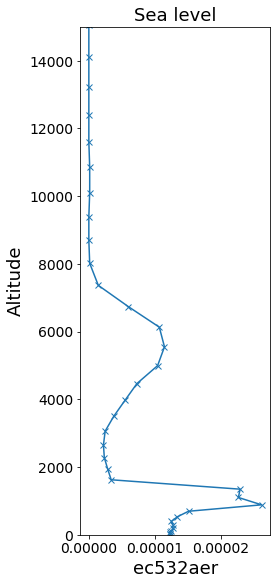

In [22]:
from pyaerocom import VerticalProfile
prof = VerticalProfile(ec_data_sl, alt_levs_sl, var_name='ec532aer')
ax = prof.plot()
ax.set_ylim([0, 15000])
ax.set_title('Sea level')

##### Hardangervidda coordinate

In [15]:
ec_data_hv = ec532aer[30, :, lat_idx_hv, lon_idx_hv].grid.data
ec_data_hv

masked_array(data=[5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 5.55111512e-17, 5.55111512e-17,
                   5.55111512e-17, 1.30050991e-07, 6.50254956e-07,
                   2.21086685e-06, 3.25127478e-06, 3.90152973e-06,
                   5.20203965e-06, 6.76265154e-06, 7.02275352e-06,
                   7.28285551e-06, 9.62377335e-06, 1.14444872e

Text(0.5, 1.0, 'Hardangervidda')

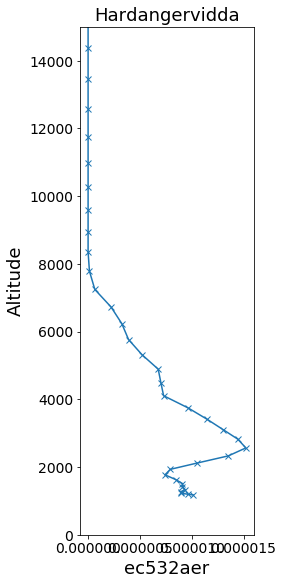

In [21]:
from pyaerocom import VerticalProfile
prof = VerticalProfile(ec_data_hv, alt_levs_hv, var_name='ec532aer')
ax = prof.plot()
ax.set_ylim([0, 15000])
ax.set_title('Hardangervidda')